# Pandas를 이용한 EDA

## 문제 정의 : 미국 역대 대통령 신장에 대한 이해

* Dataset : president_heights.csv
* Dataset 구성
    - order : 대통령 순번
    - name : 대통령 이름
    - height : 대통령 신장

In [1]:
# IPython 매직 명령
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

import warnings
warnings.filterwarnings( 'ignore' )

### 1. 데이터 수집

* DataFrame 생성
* DataFrame 기본 정보 확인

In [7]:
df = pd.read_csv( '../data/president_heights.csv', index_col = 0 )

In [11]:
df.head()

,name,height(cm)
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183


In [9]:
df.tail()

,name,height(cm)
order,,
40,Ronald Reagan,185
41,George H. W. Bush,188
42,Bill Clinton,188
43,George W. Bush,182
44,Barack Obama,185


In [12]:
df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37, 38, 39, 40, 41, 42, 43, 44],
           dtype='int64', name='order')

In [13]:
df.columns

Index(['name', 'height(cm)'], dtype='object')

In [14]:
df.values

array([['George Washington', 189],
       ['John Adams', 170],
       ['Thomas Jefferson', 189],
       ['James Madison', 163],
       ['James Monroe', 183],
       ['John Quincy Adams', 171],
       ['Andrew Jackson', 185],
       ['Martin Van Buren', 168],
       ['William Henry Harrison', 173],
       ['John Tyler', 183],
       ['James K. Polk', 173],
       ['Zachary Taylor', 173],
       ['Millard Fillmore', 175],
       ['Franklin Pierce', 178],
       ['James Buchanan', 183],
       ['Abraham Lincoln', 193],
       ['Andrew Johnson', 178],
       ['Ulysses S. Grant', 173],
       ['Rutherford B. Hayes', 174],
       ['James A. Garfield', 183],
       ['Chester A. Arthur', 183],
       ['Benjamin Harrison', 168],
       ['William McKinley', 170],
       ['Theodore Roosevelt', 178],
       ['William Howard Taft', 182],
       ['Woodrow Wilson', 180],
       ['Warren G. Harding', 183],
       ['Calvin Coolidge', 178],
       ['Herbert Hoover', 182],
       ['Franklin D. Roosevelt'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        42 non-null     object
 1   height(cm)  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [16]:
df.shape

(42, 2)

In [18]:
df.dtypes

name          object
height(cm)     int64
dtype: object

### 2. 데이터 전처리

* 변수 이름 변경
* 결측치 확인 - 결측치가 존재하지 않는다.
* 중복 데이터 확인 - 중복 데이터가 존재하지 않는다.
* 이상치 확인 - 이상치가 없다.

In [19]:
df.rename( columns = { 'height(cm)': 'height' }, inplace = True )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    42 non-null     object
 1   height  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [20]:
df.isnull().sum() # 결측치 확인

name      0
height    0
dtype: int64

In [21]:
df.duplicated().sum( axis = 0 ) # 중복 데이터 확인

0

<AxesSubplot:>

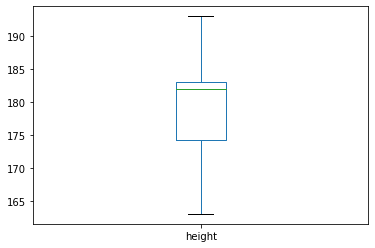

In [22]:
df[ 'height' ].plot( kind = 'box' ) # 이상치 확인은 위한 box plot

### 3. EDA

#### 3.1 역대 대통령 신장

In [23]:
df

,name,height
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Ha...,173


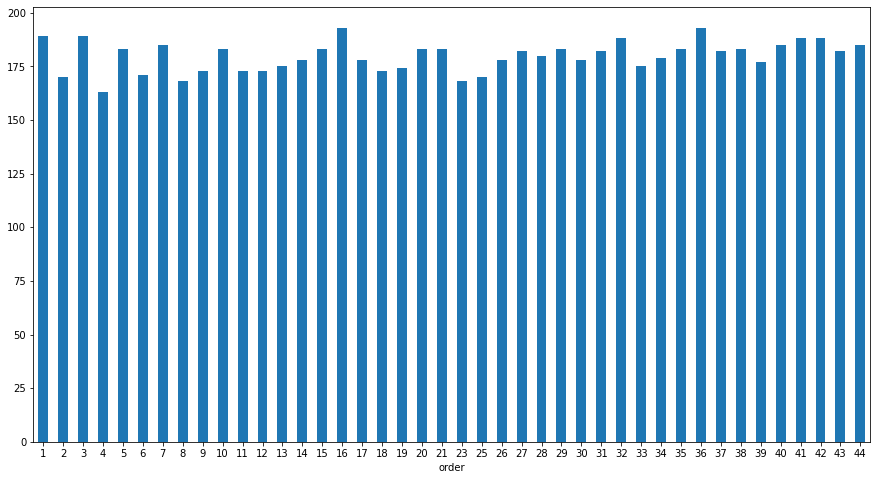

In [31]:
ax = df[ 'height' ].plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( df.index, rotation = 0 )
plt.show()

#### 3.2 역대 대통령 신장순 분포

In [34]:
df_sort = df.sort_values( by = 'height', ascending = False )
df_sort

,name,height
order,,
16,Abraham Lincoln,193
36,Lyndon B. Johnson,193
1,George Washington,189
3,Thomas Jefferson,189
42,Bill Clinton,188
41,George H. W. Bush,188
32,Franklin D. Roos...,188
40,Ronald Reagan,185
44,Barack Obama,185


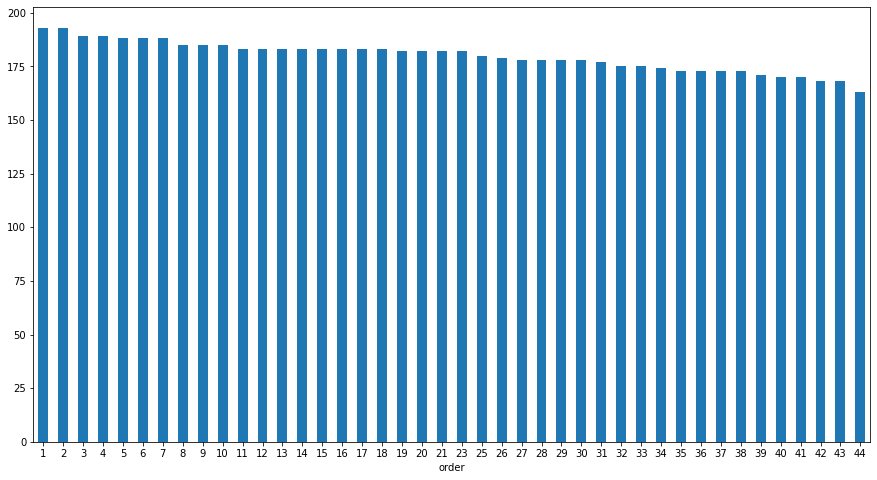

In [35]:
ax = df_sort[ 'height' ].plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( df.index, rotation = 0 )
plt.show()

* 175cm 이상의 대통령이 대부분을 차지 한다.

#### 3.3 역대 대통령 신장 요약

In [43]:
df[ 'height' ].value_counts() # 고유값 확인

183    8
178    4
173    4
182    4
188    3
185    3
193    2
189    2
175    2
170    2
168    2
163    1
179    1
180    1
174    1
171    1
177    1
Name: height, dtype: int64

In [42]:
round( df.describe(), 2 ) # 기초 통계 정보

,height
count,42.00
mean,179.74
std,7.02
min,163.00
25%,174.25
50%,182.00
75%,183.00
max,193.00


* 평균 신장은 179.7cm이다.
* 평균 신장을 중심으로 많이 퍼져있지는 않다.
* 최소 시장은 163cm, 최고 신장은 193cm이다.
* 2사분위수와 3사분위수가 거의 같은 값이므로 데이터는 1사분위에서 2사분위사이에 분포되어 있다.

#### 3.4 최소 신장 대통령

In [44]:
mask = df[ 'height' ] <= df[ 'height' ].min()
min_height = df[ mask ]
min_height

,name,height
order,,
4,James Madison,163


* 미국 역대 대통령중 최소 신장 대통령은 ***4대 James Madison 대통령***으로 ***163cm*** 이다.

#### 3.5 최고 신장 대통령

In [45]:
mask = df[ 'height' ] >= df[ 'height' ].max()
max_height = df[ mask ]
max_height

,name,height
order,,
16,Abraham Lincoln,193
36,Lyndon B. Johnson,193


* 미국 역대 대통령중 최고 신장 대통령은 ***16대 Abraham Lincoln 대통령***과 ***36대 Lyndon B. Johnson 대통령***으로 ***193cm*** 이다.

#### 3.6 미국 역대 대통령 신장별 구간 정보

In [49]:
count, bin_dividers = np.histogram( df[ 'height' ], bins = 6 )

print( '미국 역대 대통령 신장을 6구간으로 분할' )
print( f'구간 분할 경계 : {bin_dividers}' )
print( f'구간별 인원 수 : {count}' )

미국 역대 대통령 신장을 6구간으로 분할
구간 분할 경계 : [163. 168. 173. 178. 183. 188. 193.]
구간별 인원 수 : [ 1  5  8 10 11  7]


<AxesSubplot:xlabel='height', ylabel='Density'>

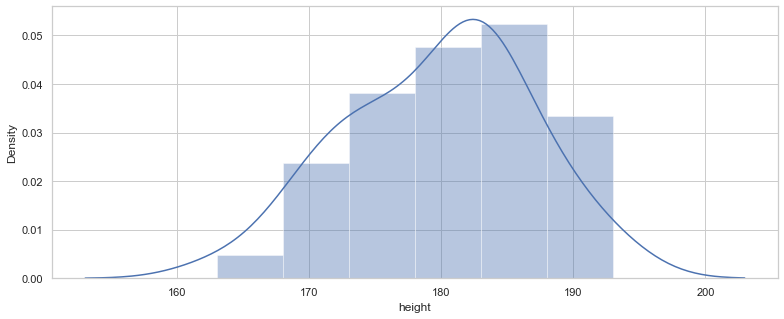

In [51]:
sns.set_theme( style = 'whitegrid' )
plt.figure( figsize = ( 13, 5 ) )
sns.distplot( df[ 'height' ], kde = True )

#### 3.7 평균 신장 이상 / 이하 대통령 정보

In [52]:
mean_height = df[ 'height' ].mean()
print( f'미국 역대 대통령 평균 신장 : {round( mean_height, 2 )}cm' )

미국 역대 대통령 평균 신장 : 179.74cm


#### 평균 신장 이하 대통령 정보

In [56]:
mean_height_under = df.loc[ df.height <= mean_height ]
mean_height_under_sort = mean_height_under.sort_values( by = 'height' )

print( f'미국 역대 대통령 평균 신장 {round( mean_height, 2 ) }cm ', end = '' )
print( f'이하 대통령 수는 {mean_height_under_sort.height.count()}명이다.\n' )

mean_height_under_sort

미국 역대 대통령 평균 신장 179.74cm 이하 대통령 수는 19명이다.



,name,height
order,,
4,James Madison,163
8,Martin Van Buren,168
23,Benjamin Harrison,168
2,John Adams,170
25,William McKinley,170
6,John Quincy Adams,171
9,William Henry Ha...,173
11,James K. Polk,173
12,Zachary Taylor,173


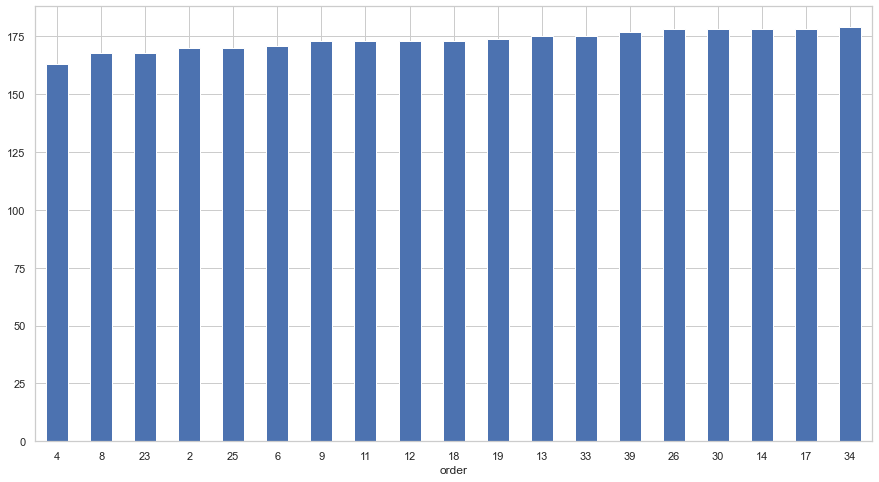

In [58]:
ax = mean_height_under_sort[ 'height' ].plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( mean_height_under_sort.index, rotation = 0 )
plt.show()

#### 평균 신장 이상 대통령 정보

In [60]:
mean_height_over = df.loc[ df.height >= mean_height ]
mean_height_over_sort = mean_height_over.sort_values( by = 'height', 
                                                      ascending = False )

print( f'미국 역대 대통령 평균 신장 {round( mean_height, 2 ) }cm ', end = '' )
print( f'이상 대통령 수는 {mean_height_over_sort.height.count()}명이다.\n' )

mean_height_over_sort

미국 역대 대통령 평균 신장 179.74cm 이상 대통령 수는 23명이다.



,name,height
order,,
36,Lyndon B. Johnson,193
16,Abraham Lincoln,193
1,George Washington,189
3,Thomas Jefferson,189
42,Bill Clinton,188
41,George H. W. Bush,188
32,Franklin D. Roos...,188
40,Ronald Reagan,185
44,Barack Obama,185


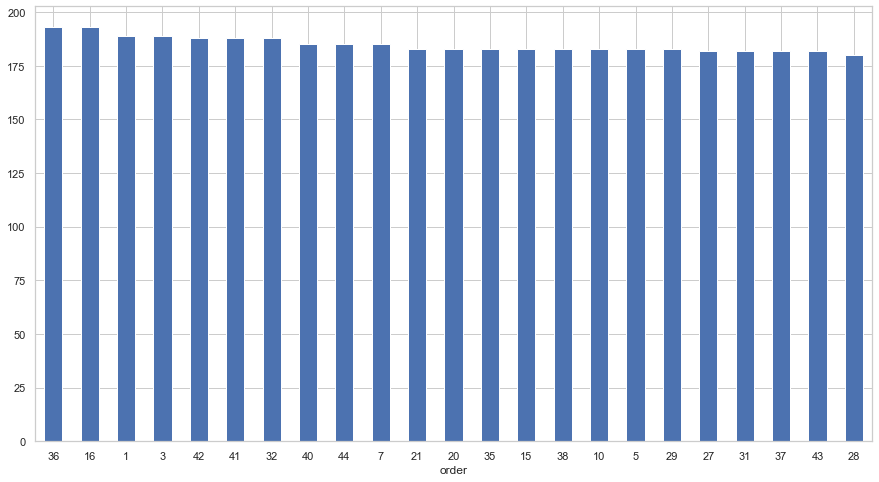

In [61]:
ax = mean_height_over_sort[ 'height' ].plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( mean_height_over_sort.index, rotation = 0 )
plt.show()

#### 3.8 대통령 신장별 인원수

In [75]:
def height_value_count( height_s ):
    count = df[ 'height' ].count() # 전체 인원수
    height = list( height_s.index ) # 신장
    height_count = list( height_s.values ) # 인원수
    
    print( '대통령 신장별 인원수'.center( 20 ), '\n' )
    for i in range( len( height_count ) ):
        print( f'[ {height[ i ]:3}cm ] - {height_count[ i ]}명', end = '' )
        print( f'( {height_count[ i ] / count * 100:5.2f}% )' )

In [77]:
height_s = df[ 'height' ].value_counts()

height_value_count( height_s )

    대통령 신장별 인원수      

[ 183cm ] - 8명( 19.05% )
[ 178cm ] - 4명(  9.52% )
[ 173cm ] - 4명(  9.52% )
[ 182cm ] - 4명(  9.52% )
[ 188cm ] - 3명(  7.14% )
[ 185cm ] - 3명(  7.14% )
[ 193cm ] - 2명(  4.76% )
[ 189cm ] - 2명(  4.76% )
[ 175cm ] - 2명(  4.76% )
[ 170cm ] - 2명(  4.76% )
[ 168cm ] - 2명(  4.76% )
[ 163cm ] - 1명(  2.38% )
[ 179cm ] - 1명(  2.38% )
[ 180cm ] - 1명(  2.38% )
[ 174cm ] - 1명(  2.38% )
[ 171cm ] - 1명(  2.38% )
[ 177cm ] - 1명(  2.38% )


In [81]:
from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

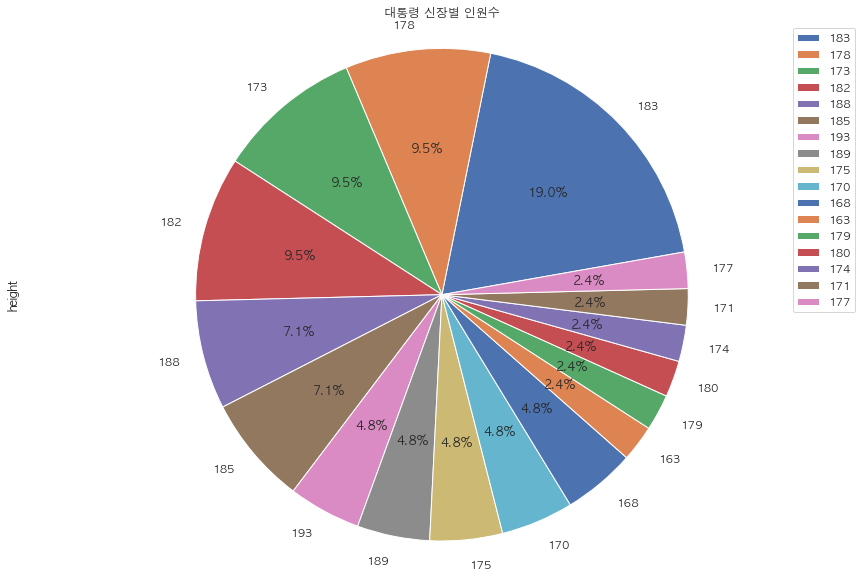

In [82]:
height_s.plot( kind = 'pie', figsize = ( 15, 10 ),
               autopct = '%1.1f%%', startangle = 10 )
plt.title( '대통령 신장별 인원수' )
plt.axis( 'equal' )
plt.legend( labels = height_s.index, loc = 'best' )
plt.show()

## 문제 정의 : 2020년 4월 서울시 유동인구에 대한 이해

* Dataset : Floating_Population_2004.csv
* Dataset 구성
    - 일자 : 유동 인구를 수집한 날짜( 2020/04/01 ~ 2020/04/30 )
    - 시간 : 유동 인구를 수집한 시간( 0시 ~ 23시 )
    - 연령 : 유동 인구를 수집한 연령( 20대 ~ 70대 )
    - 시 : 유동 인구를 수집한 시( 서울시 )
    - 구 : 유동 인구를 수집한 구
    - 유동 인구수 : 수집한 유동 인구수

### 1. 데이터 수집

* DataFrame 생성
* DataFrame 기본 정보 확인

In [84]:
df = pd.read_csv( '../data/Floating_Population_2004.csv', 
                  encoding = 'utf-8' )

In [85]:
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200401,0,20,남성,서울,도봉구,21490
1,20200401,0,30,여성,서울,동대문구,27260
2,20200401,0,50,남성,서울,구로구,35670
3,20200401,1,30,여성,서울,강남구,52380
4,20200401,1,40,남성,서울,동대문구,28420


In [86]:
df.tail()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215995,20200430,22,40,여성,서울,성동구,22150
215996,20200430,22,50,여성,서울,서대문구,23270
215997,20200430,23,20,여성,서울,용산구,18570
215998,20200430,23,30,여성,서울,서대문구,21100
215999,20200430,23,40,남성,서울,강남구,45730


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   시           216000 non-null  object
 5   군구          216000 non-null  object
 6   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 11.5+ MB


In [88]:
df.shape

(216000, 7)

In [90]:
df.dtypes

일자                 int64
시간(1시간단위)      int64
연령대(10세단위)     int64
성별                object
시                  object
군구                object
유동인구수           int64
dtype: object

### 2. 데이터 전처리

#### 불필요한 변수 삭제

In [91]:
df.drop( '시', axis = 1, inplace = True )

In [92]:
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,군구,유동인구수
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   군구          216000 non-null  object
 5   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


#### 변수 이름 변경

In [94]:
df.rename( columns = { '시간(1시간단위)': '단위시간',
                       '연령대(10세단위)': '연령대',
                       '군구': '구' }, inplace = True )

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   일자      216000 non-null  int64 
 1   단위시간    216000 non-null  int64 
 2   연령대     216000 non-null  int64 
 3   성별      216000 non-null  object
 4   구       216000 non-null  object
 5   유동인구수   216000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


#### 변수 형식 변환( 범주형, 문자형 )

In [102]:
df[ '단위시간' ] = df[ '단위시간' ].astype( 'category' )
df[ '연령대' ] = df[ '연령대' ].astype( 'category' )
df[ '성별' ] = df[ '성별' ].astype( 'category' )
df[ '구' ] = df[ '구' ].astype( 'category' )

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   일자      216000 non-null  int64   
 1   단위시간    216000 non-null  category
 2   연령대     216000 non-null  category
 3   성별      216000 non-null  category
 4   구       216000 non-null  category
 5   유동인구수   216000 non-null  int64   
dtypes: category(4), int64(2)
memory usage: 4.1 MB


In [104]:
df[ '일자' ] = df[ '일자' ].astype( 'str' )

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   일자      216000 non-null  object  
 1   단위시간    216000 non-null  category
 2   연령대     216000 non-null  category
 3   성별      216000 non-null  category
 4   구       216000 non-null  category
 5   유동인구수   216000 non-null  int64   
dtypes: category(4), int64(1), object(1)
memory usage: 4.1+ MB


#### 결측치 확인

In [106]:
df.isnull().sum()

일자          0
단위시간      0
연령대        0
성별          0
구            0
유동인구수    0
dtype: int64

#### 중복 데이터 확인

In [108]:
df.duplicated().sum( axis = 0 )

0

#### 이상치 확인

<AxesSubplot:>

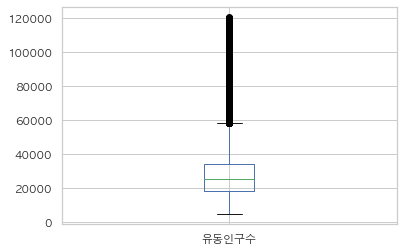

In [107]:
df.plot( kind = 'box' )

* 이상치가 존재하지만 데이터셋 성격상 이상치를 그대로 분석에 사용한다.

### 3. EDA

#### 3.1 기초 통계

In [110]:
round( df.describe(), 2 )

,유동인구수
count,216000.00
mean,27267.77
std,12480.43
min,4380.00
25%,18070.00
50%,25470.00
75%,34090.00
max,120640.00


#### 3.2 범주형 변수 확인

#### 조사 기간

In [119]:
date_list = list( df[ '일자' ].unique() )
print( '조사일자'.center( 6 ), '\n' )
for v in date_list:
    print( f'{v}\t' )
print( f'\n조사기간 : 총 {len( date_list )} 일' )

 조사일자  

20200401	
20200402	
20200403	
20200404	
20200405	
20200406	
20200407	
20200408	
20200409	
20200410	
20200411	
20200412	
20200413	
20200414	
20200415	
20200416	
20200417	
20200418	
20200419	
20200420	
20200421	
20200422	
20200423	
20200424	
20200425	
20200426	
20200427	
20200428	
20200429	
20200430	

조사기간 : 총 30 일


#### 조사시간

In [125]:
time_list = sorted( list( df[ '단위시간' ].unique() ) )
print( '조사시간'.center( 6 ), '\n' )
for v in time_list:
    print( f'{v}\t' )
print( f'\n조사시간 : 총 {len( time_list )} 시간' )

 조사시간  

0	
1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	

조사시간 : 총 24 시간


#### 조사연령대

In [129]:
age_list = sorted( list( df[ '연령대' ].unique() ) )
print( '조사연령대'.center( 8 ), '\n' )
for v in age_list:
    print( f'{v}\t' )
print( f'\n조사연령대 : 총 {len( age_list )} 개 연령대' )

 조사연령대   

20	
30	
40	
50	
60	
70	

조사연령대 : 총 6 개 연령대


#### 조사성별

In [126]:
gender_list = list( df[ '성별' ].unique() )
print( '조사성별'.center( 6 ), '\n' )
for v in gender_list:
    print( f'{v}\t' )
print( f'\n조사성별 : 총 {len( gender_list )}' )

 조사성별  

남성	
여성	

조사성별 : 총 2


#### 조사구

In [128]:
gu_list = sorted( list( df[ '구' ].unique() ) )
print( '조사구'.center( 8 ), '\n' )
for v in gu_list:
    print( f'{v}\t' )
print( f'\n조사구 : 총 {len( gu_list )} 개구' )

  조사구    

강남구	
강동구	
강북구	
강서구	
관악구	
광진구	
구로구	
금천구	
노원구	
도봉구	
동대문구	
동작구	
마포구	
서대문구	
서초구	
성동구	
성북구	
송파구	
양천구	
영등포구	
용산구	
은평구	
종로구	
중구	
중랑구	

조사구 : 총 25 개구


#### 4. 유동인구에 대한 이해

In [131]:
#
# 함수명 : func_aggregate()
# 인수 :
#       l : 데이터 list
#       v : 집계 대상
# 반환 : 집계 결과 Series 객체
#
def func_aggregate( l, v ):
    population = []
    for i in range( len( l ) ):
        mask = l[ i ] == v
        result = df.loc[ mask ]
        population.append( result.유동인구수.sum() )
    
    s = pd.Series( population, index = l )
    
    return s

#### 평균 유동인구

In [133]:
print( f'2020년 4월 평균 유동인구 : { round( df[ "유동인구수" ].mean(), 2 )}' )

2020년 4월 평균 유동인구 : 27267.77


#### 유동 인구가 가장 많은 날

In [135]:
date_s = func_aggregate( date_list, df[ '일자' ] )
daily_max = date_s.max()
date = date_s.index[ date_s.argmax() ]

print( f'유동 인구가 가장 많은날 : [ {date[ :4 ]}/{date[ 4:6 ]}/{date[ 6:]} ]\
총 유동 인구는 : {daily_max:10}명 ' )

유동 인구가 가장 많은날 : [ 2020/04/01 ]총 유동 인구는 :  200208500명 


In [141]:
daily_min = date_s.min()
date = date_s.index[ date_s.argmin() ]

print( f'유동 인구가 가장 적은날 : [ {date[ :4 ]}/{date[ 4:6 ]}/{date[ 6:]} ]\
총 유동 인구는 : {daily_min:10}명 ' )

유동 인구가 가장 적은날 : [ 2020/04/30 ]총 유동 인구는 :  186668960명 


#### 일 최대 유동 인구수 정보

In [136]:
max_population = df.유동인구수.max()
print( f'일 최대 유동인구수 : {round( max_population, 2 )}명' )

일 최대 유동인구수 : 120640명


In [137]:
df[ df.유동인구수 >= max_population ]

,일자,단위시간,연령대,성별,구,유동인구수
98155,20200428,14,30,여성,강남구,120640


#### 일 최소 유동 인구수 정보

In [138]:
min_population = df.유동인구수.min()
print( f'일 최소 유동인구수 : {round( min_population, 2 )}명' )

일 최소 유동인구수 : 4380명


In [139]:
df[ df.유동인구수 <= min_population ]

,일자,단위시간,연령대,성별,구,유동인구수
82486,20200426,3,70,남성,중구,4380


#### 날짜별 유동인구 정보

In [143]:
for date in date_list:
    print( f'[ {date[:4]}/{date[4:6]}/{date[6:]} ] 유동인구 : {date_s[ date ]:10}명' )

[ 2020/04/01 ] 유동인구 :  200208500명
[ 2020/04/02 ] 유동인구 :  199791200명
[ 2020/04/03 ] 유동인구 :  199136720명
[ 2020/04/04 ] 유동인구 :  191161060명
[ 2020/04/05 ] 유동인구 :  189696320명
[ 2020/04/06 ] 유동인구 :  199919630명
[ 2020/04/07 ] 유동인구 :  199803760명
[ 2020/04/08 ] 유동인구 :  199655110명
[ 2020/04/09 ] 유동인구 :  199541470명
[ 2020/04/10 ] 유동인구 :  199091080명
[ 2020/04/11 ] 유동인구 :  191032010명
[ 2020/04/12 ] 유동인구 :  189643560명
[ 2020/04/13 ] 유동인구 :  199241850명
[ 2020/04/14 ] 유동인구 :  199278710명
[ 2020/04/15 ] 유동인구 :  192381520명
[ 2020/04/16 ] 유동인구 :  199059920명
[ 2020/04/17 ] 유동인구 :  199406670명
[ 2020/04/18 ] 유동인구 :  190872120명
[ 2020/04/19 ] 유동인구 :  189951850명
[ 2020/04/20 ] 유동인구 :  199629090명
[ 2020/04/21 ] 유동인구 :  199479870명
[ 2020/04/22 ] 유동인구 :  199512800명
[ 2020/04/23 ] 유동인구 :  199370110명
[ 2020/04/24 ] 유동인구 :  199139940명
[ 2020/04/25 ] 유동인구 :  191227460명
[ 2020/04/26 ] 유동인구 :  189159070명
[ 2020/04/27 ] 유동인구 :  199196700명
[ 2020/04/28 ] 유동인구 :  199080570명
[ 2020/04/29 ] 유동인구 :  198499910명
[ 2020/04/30 ]

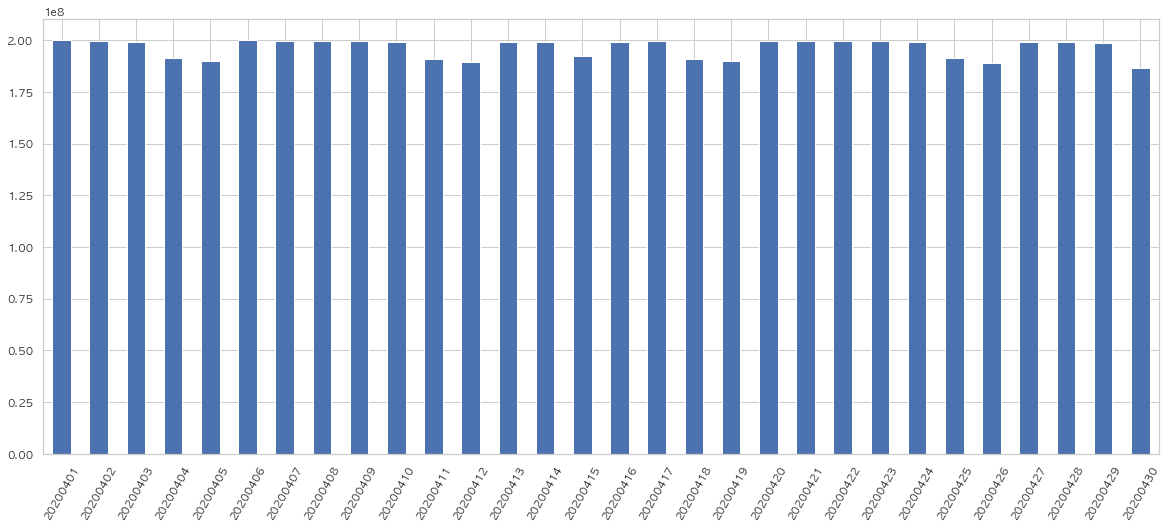

In [145]:
ax = date_s.plot( kind = 'bar', figsize = ( 20, 8 ) ) 
ax.set_xticklabels( date_s.index, rotation = 60 )
plt.show()

#### 성별 유동인구 정보

In [146]:
gender_s = func_aggregate( gender_list, df.성별 )

for gender in gender_list:
    print( f'[ {gender} ] 유동인구 : {gender_s[ gender ]:10}명' )

[ 남성 ] 유동인구 : 2851648900명
[ 여성 ] 유동인구 : 3038188640명


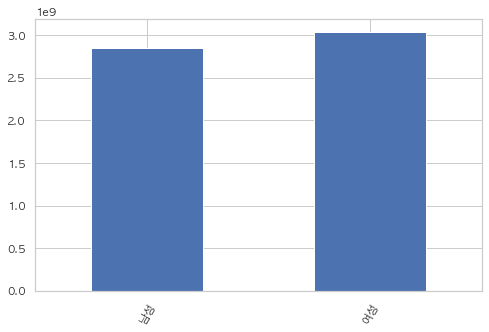

In [147]:
ax = gender_s.plot( kind = 'bar', figsize = ( 8, 5 ) )
ax.set_xticklabels( gender_s.index, rotation = 60 )
plt.show()

#### 연령별 유동인구 정보

In [149]:
age_s = func_aggregate( age_list, df.연령대 )

for age in age_list:
    print( f'[ {age} ] 유동인구 : {age_s[ age ]:10}명' )

[ 20 ] 유동인구 : 1089342970명
[ 30 ] 유동인구 : 1211368990명
[ 40 ] 유동인구 : 1204134560명
[ 50 ] 유동인구 : 1124325220명
[ 60 ] 유동인구 :  718660410명
[ 70 ] 유동인구 :  542005390명


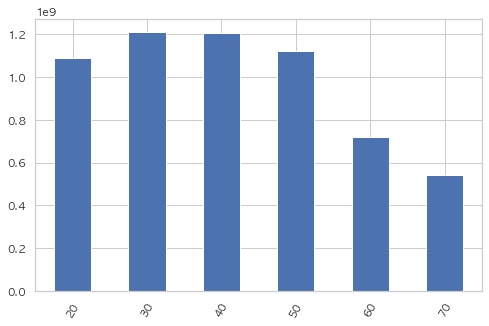

In [150]:
ax = age_s.plot( kind = 'bar', figsize = ( 8, 5 ) )
ax.set_xticklabels( age_s.index, rotation = 60 )
plt.show()

#### 시간대별 유동인구 정보

In [154]:
time_s = func_aggregate( time_list, df.단위시간 )

for time in time_list:
    print( f'[ {time:2}시  ] 유동인구 : {time_s[ time ]}명' )

[  0시  ] 유동인구 : 242193630명
[  1시  ] 유동인구 : 241777860명
[  2시  ] 유동인구 : 241293460명
[  3시  ] 유동인구 : 240629800명
[  4시  ] 유동인구 : 240087530명
[  5시  ] 유동인구 : 239669270명
[  6시  ] 유동인구 : 240212130명
[  7시  ] 유동인구 : 243316690명
[  8시  ] 유동인구 : 247004130명
[  9시  ] 유동인구 : 248900070명
[ 10시  ] 유동인구 : 249127080명
[ 11시  ] 유동인구 : 248619210명
[ 12시  ] 유동인구 : 248505400명
[ 13시  ] 유동인구 : 248750400명
[ 14시  ] 유동인구 : 249091620명
[ 15시  ] 유동인구 : 249459470명
[ 16시  ] 유동인구 : 249842610명
[ 17시  ] 유동인구 : 249994940명
[ 18시  ] 유동인구 : 248587220명
[ 19시  ] 유동인구 : 246613060명
[ 20시  ] 유동인구 : 245624290명
[ 21시  ] 유동인구 : 244744910명
[ 22시  ] 유동인구 : 243447240명
[ 23시  ] 유동인구 : 242345520명


In [155]:
time_max = time_s.idxmax()
time_min = time_s.idxmin()

print( f'유동 인구가 가장 많은 시간대 [ {time_max:2}시 ] 유동인구 : {time_s[ time_max ]}명')
print( f'유동 인구가 가장 적은 시간대 [ {time_min:2}시 ] 유동인구 : {time_s[ time_min ]}명')

유동 인구가 가장 많은 시간대 [ 17시 ] 유동인구 : 249994940명
유동 인구가 가장 적은 시간대 [  5시 ] 유동인구 : 239669270명


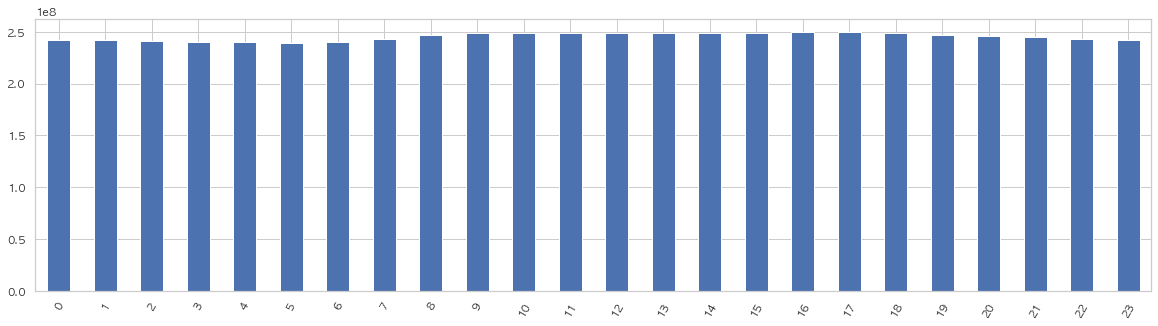

In [153]:
ax = time_s.plot( kind = 'bar', figsize = ( 20, 5 ) )
ax.set_xticklabels( time_s.index, rotation = 60 )
plt.show()

#### 구별 유동인구 정보

In [156]:
gu_s = func_aggregate( gu_list, df.구 )

for gu in gu_list:
    print( f'[ {str.rstrip( gu ):6s} ] 유동인구 : {gu_s[ gu ]:10}명' )

[ 강남구    ] 유동인구 :  415479300명
[ 강동구    ] 유동인구 :  239157350명
[ 강북구    ] 유동인구 :  171437740명
[ 강서구    ] 유동인구 :  316538320명
[ 관악구    ] 유동인구 :  285422490명
[ 광진구    ] 유동인구 :  205584150명
[ 구로구    ] 유동인구 :  252685600명
[ 금천구    ] 유동인구 :  162236340명
[ 노원구    ] 유동인구 :  286372000명
[ 도봉구    ] 유동인구 :  172730720명
[ 동대문구   ] 유동인구 :  209673270명
[ 동작구    ] 유동인구 :  224537120명
[ 마포구    ] 유동인구 :  245660870명
[ 서대문구   ] 유동인구 :  182865220명
[ 서초구    ] 유동인구 :  293867470명
[ 성동구    ] 유동인구 :  184605390명
[ 성북구    ] 유동인구 :  243666730명
[ 송파구    ] 유동인구 :  372279240명
[ 양천구    ] 유동인구 :  235960940명
[ 영등포구   ] 유동인구 :  280428050명
[ 용산구    ] 유동인구 :  151474540명
[ 은평구    ] 유동인구 :  241684780명
[ 종로구    ] 유동인구 :  152183320명
[ 중구     ] 유동인구 :  152646440명
[ 중랑구    ] 유동인구 :  210660150명


In [158]:
gu_max = gu_s.idxmax()
gu_min = gu_s.idxmin()

print( f'유동 인구가 가장 많은 구 [ {str.rstrip(gu_max):6s} ] 유동인구 : {gu_s[ gu_max ]}명')
print( f'유동 인구가 가장 적은 구 [ {str.rstrip(gu_min):6s} ] 유동인구 : {gu_s[ gu_min ]}명')

유동 인구가 가장 많은 구 [ 강남구    ] 유동인구 : 415479300명
유동 인구가 가장 적은 구 [ 용산구    ] 유동인구 : 151474540명


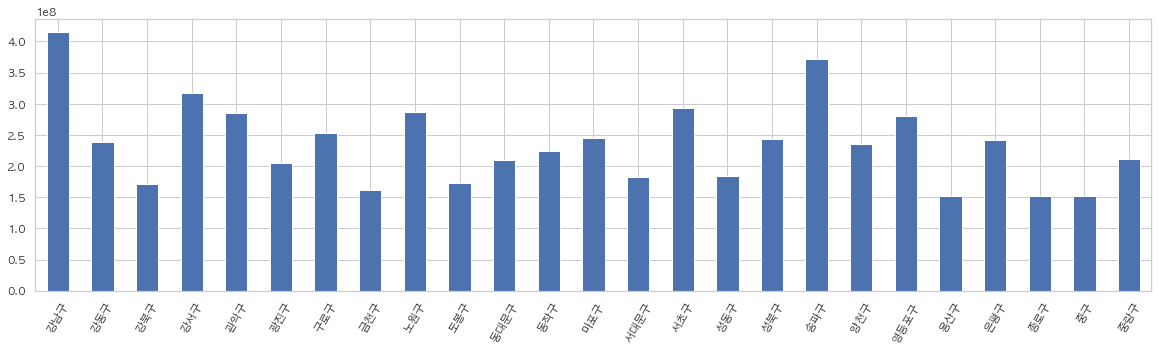

In [157]:
ax = gu_s.plot( kind = 'bar', figsize = ( 20, 5 ) )
ax.set_xticklabels( gu_s.index, rotation = 60 )
plt.show()

#### 성별에 대한 유동인구

In [166]:
grouped = df.groupby( [ '성별' ] )
average = grouped.mean()
round( average, 2 )

,유동인구수
성별,
남성,26404.16
여성,28131.38


In [167]:
grouped = df.groupby( [ '연령대', '성별' ] )
average = grouped.mean()
round( average, 2 )

유동인구수
연령대 성별            
20     남성    29551.40
       여성    30967.65
30     남성    34005.85
       여성    33292.42
40     남성    33447.54
       여성    33448.82
50     남성    30079.95
       여성    32382.56
60     남성    18737.68
       여성    21187.90
70     남성    12602.52
       여성    17508.89

In [169]:
grouped = df.groupby( [ '단위시간', '성별' ] )
average = grouped.mean()
round( average, 2 )

유동인구수
단위시간 성별            
0        남성    26139.43
         여성    27681.38
1        남성    26080.88
         여성    27647.54
2        남성    26008.77
         여성    27612.00
3        남성    25910.56
         여성    27562.73
4        남성    25837.44
         여성    27515.34
5        남성    25778.71
         여성    27481.13
6        남성    25840.63
         여성    27539.84
7        남성    26187.76
         여성    27882.62
8        남성    26524.47
         여성    28365.33
9        남성    26691.29
         여성    28619.84
10       남성    26692.53
         여성    28669.04
11       남성    26615.14
         여성    28633.57
12       남성    26602.78
         여성    28620.64
13       남성    26639.97
         여성    28637.89
14       남성    26691.56
         여성    28662.14
15       남성    26755.83
         여성    28679.61
16       남성    26837.22
         여성    28683.36
17       남성    26903.79
         여성    28650.64
18       남성    26819.25
         여성    28422.36
19       남성    26634.94
         여성    28167.96
20       남성    26547.11
         여성    28036.06
21       남성    26461.94
         여성    27925.82
22       남성    26316.96
         여성    27782.43
23       남성    26180.80
         여성    27673.76

In [171]:
pdf = pd.pivot_table( df, index = '일자',
                      columns = '성별', values = '유동인구수',
                      aggfunc = [ 'mean' ] )
pdf

mean              
성별              남성          여성
일자                                
20200401  26900.636111  28712.836111
20200402  26838.577778  28658.977778
20200403  26782.972222  28532.783333
20200404  25776.711111  27323.583333
20200405  25634.172222  27059.250000
20200406  26933.436111  28599.794444
20200407  26828.638889  28672.405556
20200408  26789.225000  28670.527778
20200409  26782.125000  28646.061111
20200410  26751.172222  28551.905556
20200411  25741.205556  27323.241667
20200412  25623.016667  27055.750000
20200413  26823.697222  28521.261111
20200414  26772.969444  28582.227778
20200415  25830.427778  27608.883333
20200416  26740.013889  28554.408333
20200417  26825.030556  28565.711111
20200418  25707.216667  27312.816667
20200419  25650.372222  27114.030556
20200420  26872.186111  28580.338889
20200421  26756.016667  28655.058333
20200422  26744.088889  28676.133333
20200423  26722.702778  28657.883333
20200424  26726.650000  28590.000000
20200425  25726.825000  27391.913889
20200426  25510.430556  27033.755556
20200427  26782.969444  28549.447222
20200428  26689.616667  28610.541667
20200429  26655.030556  28483.833333
20200430  25206.561111  26645.927778

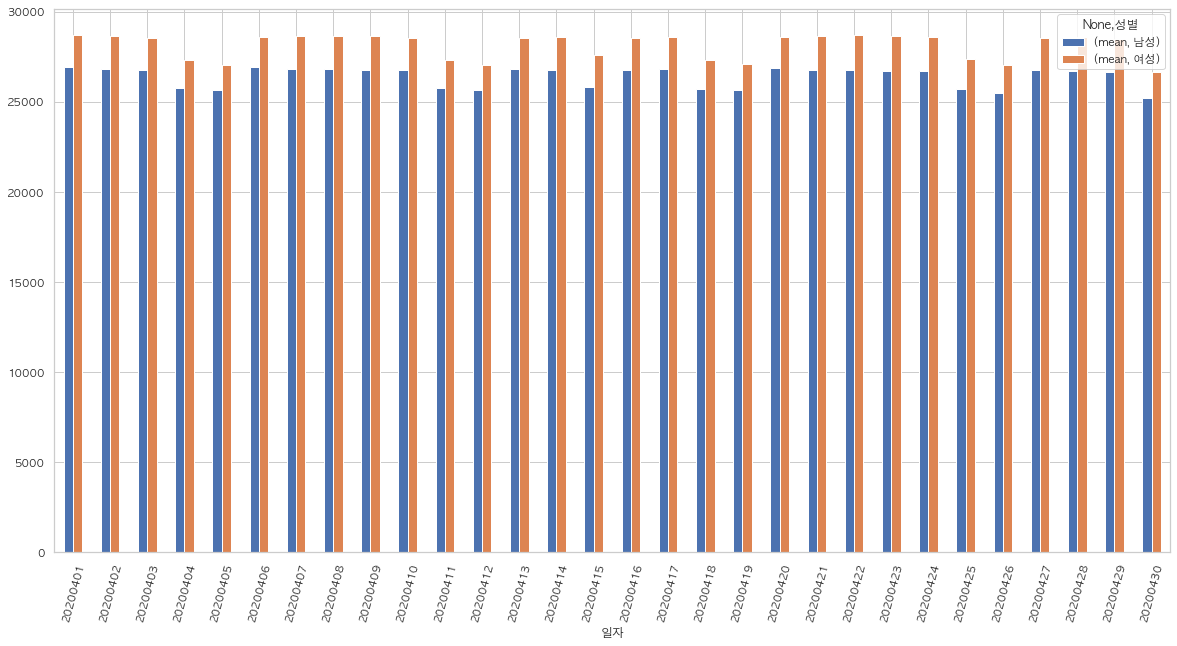

In [172]:
ax = pdf.plot( kind = 'bar', figsize = ( 20, 10 ) )
ax.set_xticklabels( pdf.index, rotation = 75 )
plt.show()

In [174]:
pdf = pd.pivot_table( df, index = '일자',
                      columns = '연령대', values = '유동인구수',
                      aggfunc = [ 'mean' ] )
round( pdf, 2 )

mean                                                  
연령대          20        30        40        50        60        70
일자                                                                
20200401  30657.71  34529.46  34339.71  31839.45  20262.92  15211.17
20200402  30630.36  34452.88  34257.91  31762.31  20205.44  15183.77
20200403  30675.22  34306.78  34019.78  31653.38  20140.10  15152.01
20200404  29808.96  32360.68  32129.76  30457.14  19627.57  14916.78
20200405  29373.45  32023.52  31973.92  30326.75  19521.63  14860.99
20200406  30560.51  34458.73  34329.54  31834.49  20237.39  15179.02
20200407  30589.63  34486.32  34288.09  31761.47  20210.45  15167.18
20200408  30606.95  34458.58  34231.95  31721.08  20193.40  15167.29
20200409  30617.66  34437.88  34213.58  31690.90  20172.08  15152.46
20200410  30674.38  34304.88  34024.44  31621.03  20146.57  15137.94
20200411  29782.60  32325.80  32086.70  30432.25  19645.39  14920.60
20200412  29336.18  31985.13  31934.73  30332.87  19567.53  14879.85
20200413  30461.68  34303.75  34201.47  31732.38  20178.61  15157.00
20200414  30571.22  34390.84  34151.81  31651.81  20150.65  15149.27
20200415  29665.38  32648.78  32517.51  30693.55  19812.47  14980.25
20200416  30520.36  34327.33  34137.01  31635.37  20127.47  15135.73
20200417  30608.01  34321.10  34103.19  31728.98  20242.58  15168.37
20200418  29854.09  32326.40  32061.03  30356.42  19586.55  14875.61
20200419  29388.99  32111.22  32019.32  30352.12  19557.01  14864.54
20200420  30511.70  34414.97  34293.69  31774.25  20207.89  15155.08
20200421  30556.15  34441.57  34259.68  31674.37  20166.60  15134.86
20200422  30589.88  34439.46  34244.78  31670.89  20171.25  15144.41
20200423  30621.39  34435.27  34201.07  31628.55  20132.64  15122.83
20200424  30752.24  34383.37  34063.50  31561.95  20097.94  15090.95
20200425  30005.15  32502.22  32093.46  30324.82  19574.78  14855.78
20200426  29517.12  31992.68  31789.81  30107.80  19422.94  14802.21
20200427  30524.57  34385.33  34206.02  31658.85  20119.00  15103.48
20200428  30553.34  34410.81  34182.91  31591.28  20073.48  15088.65
20200429  30555.01  34286.39  34034.58  31493.52  20000.65  15046.44
20200430  29215.93  31222.02  31054.50  29867.67  19330.68  14866.66

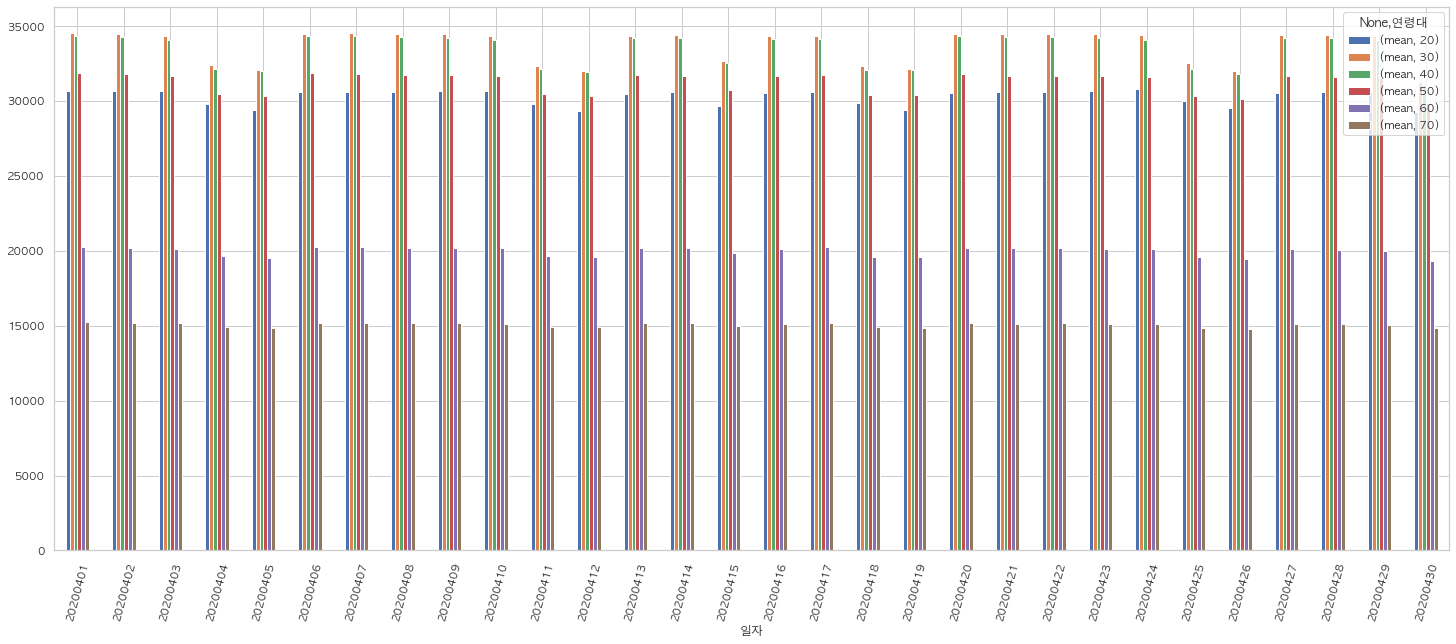

In [176]:
ax = pdf.plot( kind = 'bar', figsize = ( 25, 10 ) )
ax.set_xticklabels( pdf.index, rotation = 75 )
plt.show()